# 911 Anrufe Projekt - Aufgabe

Für dieses Meilensteinprojekt analysieren wir daren von Anrufen die bei der amerikanischen Polizei (am. Rufnummer: 911) eingehen. Dieser Datensatz wird bei [Kaggle](https://www.kaggle.com/mchirico/montcoalert) bereitgestellt. Er beinhaltet die folgenden Felder:

* lat: String Variable, Breitengrad
* lng: String Variable, Längengrad
* desc: String Variable, Beschreibung des Notrufs
* zip: String Variable, Postleitzahl
* title: String Variable, Titel
* timeStamp: String Variable, Zeit: YYYY-MM-DD HH:MM:SS
* twp: String Variable, Gemeinde
* addr: String Variable, Addresse
* e: String Variable, Dummy Variable (immer 1)

Folge jetzt dem Notebook und versuche alle Aufgaben zu lösen oder Fragen zu beantworten. Vertraut auf eure Python und Data Science Fähigkeiten!

## Daten und Vorbereitungen

**Importiere Numpy und Pandas.**

In [131]:
import pandas as pd
import numpy as np
import seaborn as sns

# show full output
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"

**Importiere Visualisierungs-Librarys und nutze %matplotlib inline.**

In [132]:
import matplotlib.pyplot as plt
% matplotlib inline


UsageError: Line magic function `%` not found.


**Lese das "911.csv" als DataFrame mit Namen df ein.**

In [133]:
df = pd.read_csv("../../../data/911.csv")

**Schaue dir die Infos zum DataFrame an.**

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


**Schaue dir den Tabellenkopf an.**

In [135]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


## Grundlegende Fragen

**Was sind die Top 5 Postleitzahlen (en. zipcodes) mit Notrufen?**

In [136]:
df.nunique()
df["zip"].value_counts().head()

lat          14579
lng          14586
desc         99455
zip            104
title          110
timeStamp    72577
twp             68
addr         21914
e                1
dtype: int64

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

**Was sind die Top 5 Gemeinden (en. township (twp)) mit Notrufen?**

In [137]:
df["twp"].value_counts().head()

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

**Schaue dir die "title" Spalte an; wie viele einzigartige Einträge gibt es?**

In [138]:
df["title"].nunique()

110

In [139]:
df.nunique()

lat          14579
lng          14586
desc         99455
zip            104
title          110
timeStamp    72577
twp             68
addr         21914
e                1
dtype: int64

## Neue Features hinzufügen
### New columns with lambdas


**In der Titelspalte, sind "Gründe/Zuständigkeiten" vor dem Titelcode spezifiziert. Diese lauten "EMS", "Fire" und "Traffic". Nutze `.apply()` mit einer selbsterstellten lambda Funktion, um eine neue Spalte namens "Reason" (dt. Grund) zu erstellen, die diesen String enthält.**

Zum Beispiel, wenn der Titel "EMS: BACK PAINS/INJURY" lautet, dann soll in der Spalte für den Grund "EMS" stehen.

In [140]:
df["reason"] = df["title"].apply(lambda x: x.split(':')[0])
df

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS
...,...,...,...,...,...,...,...,...,...,...
99487,40.132869,-75.333515,MARKLEY ST & W LOGAN ST; NORRISTOWN; 2016-08-2...,19401.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:06:00,NORRISTOWN,MARKLEY ST & W LOGAN ST,1,Traffic
99488,40.006974,-75.289080,LANCASTER AVE & RITTENHOUSE PL; LOWER MERION; ...,19003.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:07:02,LOWER MERION,LANCASTER AVE & RITTENHOUSE PL,1,Traffic
99489,40.115429,-75.334679,CHESTNUT ST & WALNUT ST; NORRISTOWN; Station ...,19401.0,EMS: FALL VICTIM,2016-08-24 11:12:00,NORRISTOWN,CHESTNUT ST & WALNUT ST,1,EMS
99490,40.186431,-75.192555,WELSH RD & WEBSTER LN; HORSHAM; Station 352; ...,19002.0,EMS: NAUSEA/VOMITING,2016-08-24 11:17:01,HORSHAM,WELSH RD & WEBSTER LN,1,EMS


**Was ist der häufigste Grund für Notrufe (basiert auf der neuen Spalte)?**

In [141]:
df['reason'].value_counts().max()
df['reason'].value_counts()

48877

EMS        48877
Traffic    35695
Fire       14920
Name: reason, dtype: int64

**Nutze jetzt Seaborn um ein `countplot` der Gründe für Notrufe zu erstellen.**

<AxesSubplot:xlabel='reason', ylabel='count'>

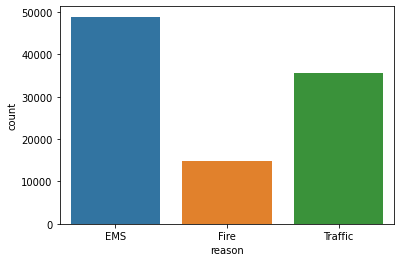

In [142]:
sns.countplot(x='reason', data=df)

### Timestamp converting
**Jetzt werden wir uns mehr auf die Zeitinformationen konzentrieren. Welchen Datentyp haben die Objekte in der *timestamp* Spalte?**

In [143]:
type(df['timeStamp'][0])

df.dtypes
df['timeStamp'][0]
df['timeStamp'].iloc[0]

str

lat          float64
lng          float64
desc          object
zip          float64
title         object
timeStamp     object
twp           object
addr          object
e              int64
reason        object
dtype: object

'2015-12-10 17:40:00'

'2015-12-10 17:40:00'

**Das Ergebnis der vorherigen Aufgabe sollte zeigen, dass diese Zeitinformation noch als String vorliegt. Nutze `pd.to_datetime`([Dokumentation](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html)), um diese Spalte vom String zum DateTime Datentyp zu ändern.**

In [144]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])
type(df['timeStamp'][0])
df.dtypes

pandas._libs.tslibs.timestamps.Timestamp

lat                 float64
lng                 float64
desc                 object
zip                 float64
title                object
timeStamp    datetime64[ns]
twp                  object
addr                 object
e                     int64
reason               object
dtype: object

**Jetzt können wir spezifische Attribute des DateTime-Objekts abrufen, indem wir sie aufrufen. Zum Beispiel:**

    time = df['timeStamp'].iloc[0]
    time.hour
    
Durch Jupyters *Tab-Funktion* lassen sich alle Attribute erkunden, die wir auf "time" anwenden könnten.

**Unsere Zeitinformationen liegen jetzt als DateTime Objekt vor. Nutze .apply() um 3 neue Spalten mit Namen "Hour" (dt. Stunde), "Month" (dt. Monat) und "Day of Week" (dt. Wochentag). Dazu bietet sich am besten die "timeStamp" Spalte an. Falls Schwierigkeiten beim Coden auftreten kannst du auf die Lösung zurückgreifen.**

In [145]:
df['hour'] = df['timeStamp'].apply(lambda x: x.hour)
df['month'] = df['timeStamp'].apply(lambda x: x.month)
df['day'] = df['timeStamp'].apply(lambda x: x.dayofweek)

df

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,hour,month,day
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,3
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,3
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99487,40.132869,-75.333515,MARKLEY ST & W LOGAN ST; NORRISTOWN; 2016-08-2...,19401.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:06:00,NORRISTOWN,MARKLEY ST & W LOGAN ST,1,Traffic,11,8,2
99488,40.006974,-75.289080,LANCASTER AVE & RITTENHOUSE PL; LOWER MERION; ...,19003.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:07:02,LOWER MERION,LANCASTER AVE & RITTENHOUSE PL,1,Traffic,11,8,2
99489,40.115429,-75.334679,CHESTNUT ST & WALNUT ST; NORRISTOWN; Station ...,19401.0,EMS: FALL VICTIM,2016-08-24 11:12:00,NORRISTOWN,CHESTNUT ST & WALNUT ST,1,EMS,11,8,2
99490,40.186431,-75.192555,WELSH RD & WEBSTER LN; HORSHAM; Station 352; ...,19002.0,EMS: NAUSEA/VOMITING,2016-08-24 11:17:01,HORSHAM,WELSH RD & WEBSTER LN,1,EMS,11,8,2


**Achte darauf, dass der "Day of Week" eine Zahl von 0 bis 6 ist. Nutze die `.map()` Methode mit folgendem Dictionary, um daraus Strings zu machen:**

In [146]:
day_key = list(range(7))
day_values = ['mon', 'tue', 'wed', 'thu', 'fri', 'sat', 'sun']
day_dict = dict(zip(day_key, day_values))

df['day'] =df['day'].map(lambda x : day_dict[x])
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,hour,month,day
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,thu
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,thu
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,thu
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,thu


**Jetzt nutze Searborn, um ein `countplot` zu erstellen. Es soll für jeden Wochentag farblich unterscheiden, was der Grund für den Notruf war.**

In [ ]:
sns.countplot()

**Tue jetzt das gleiche für jeden Monat.**

**Fällt dir etawas an diesem Diagramm auf?**

In [ ]:
# Antwort

Dir sollte auffallen, dass einige Monate fehlen. Lass uns versuchen die fehlende Information zurückzuholen indem wir sie anders darstellen. Evtl. ein einfaches Liniendiagramm. Um das zu erreichen verwenden wir Pandas...

**Erstelle jetzt ein groupby-Objekt namens "byMonth", indem du den DataFrame nach der Monatsspalte und nutze die `count()` Methode zur Aggregation. Anschließend nutze die `head()` Methode auf den zurückgegebenen DataFrame.**

**Erstelle eine einfaches Diagramm des DataFrames der den Anzahl (en. count) von Anrufen pro Monat zeigt.**

**Jetzt versuche Seaborn's `lmplot()`, um eine lineare Annäherung auf die Anrufe pro Monat zu legen.**

*Hinweis: Denke daran, dass der Index möglicherweise zu einer Spalte gesetzt werden muss.*

**Erstelle eine neue Spalte namens "Date" (dt. Datum), die das Datum aus der timeStamp Spalte beinhaltet. Dazu wirst du die `.date()` Methode nutzen müssen.**

**Gruppiere jetzt über diese Date Spalte und aggregiere mit `count()`. Erstelle dann ein Diagramm der Anzahl an Notrufen.**

**Erstelle dieses Diagramm nun erneut, aber trenne insgesamt drei Diagramme für jeden Grund von Notruf.**

**Jetzt können wir mit Heatmaps und Seaborn weitermachen. Dazu müssen wir unseren DataFrame etwas restrukturieren, sodass die Stunden zu den Spalten werden und der "Day of Week" der Index. Es gibt dazu viele Möglichkeiten. Ich empfehle eine Kombination aus `groupby` und der `unstack` ([zur Dokumentation](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.unstack.html)) Methode.**

Falls du hier nicht weiter kommst schaue in die Lösung.

**Erstelle jetzt eine HeatMap unter Verwendung des neuen DataFrames.**

**Erstelle jetzt eine Clustermap unter Verwendung des neuen DataFrames.**

**Wiederhole diesen Vorgang nun unter Verwendung des Monats als Spaltenunterteilung.**

**Super! Jetzt kannst du die Daten gerne noch weiter auf eigene Faust erkunden.**

# Gut gemacht!